# Jayveersinh Raj
# BS20-DS-01
# j.raj@innopolis.university

## Importing dependencies

In [1]:
# downloading thinkdsp
!pip install thinkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for thinkx: filename=thinkx-1.1.3-py3-none-any.whl size=59942 sha256=c9d6f09e6189f60a2f6f0254e8d0d310e21c19b77f1305db9e82df27613dba96
  Stored in directory: /root/.cache/pip/wheels/5e/fb/91/506f7f82cc754d3310b68a59ae3c08ca7fefe6d0e83ba2f570
Successfully built thinkx


In [2]:
!pip install --upgrade thinkdsp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 36.7 MB/s eta 0:00:00


In [3]:
import os,glob
import shutil
import thinkdsp
import wave
from thinkdsp import read_wave
from random import randint
import numpy as np
from numpy.random.mtrand import randint

## File extraction

In [4]:
!unzip hw_2.zip -d '/content/hw'

Archive:  hw_2.zip
  inflating: /content/hw/hw_2/Assigment 2. Improving ML-model performance via experimenting with spectrograms and noise.pdf  
   creating: /content/hw/hw_2/barbie_vs_puppy/
   creating: /content/hw/hw_2/barbie_vs_puppy/barbie/
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_1.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_10.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_11.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_12.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_13.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_14.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_15.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_16.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_17.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_18.wav  
  inflating: /content/hw/hw_2/barbie_vs_puppy/barbie/barbie_19.wa

## Preprocessing

In [5]:
# Function for preprocessing
def add_noise(folder_path, noise_name, save_path):
  # changing it to lower case
  noise_name = noise_name.lower()

  for filename in glob.glob(os.path.join(folder_path, '*.wav')):
    with open(filename, 'r') as f:

      # Load the WAV file using thinkdsp
      filepath = os.path.join(folder_path, filename)
      #wave = thinkdsp.read_wave(filepath)

      #process_wave(filename, snr)
      
      # Try to load the original signal
      try:
        original_signal = read_wave(filepath)

      # Skipping corrupted files
      except Exception as e:
        print(f"Skipping {filename}: {e}")


        continue  

      # Generate noise on conditions
       
      # 1. Generate brownian noise
      if(noise_name == "brownian"):
        noise = thinkdsp.BrownianNoise()

      # 2. Generate uniform noise
      if(noise_name == "uniform"):
        noise = thinkdsp.UncorrelatedUniformNoise()

      # 3. Generate pink noise
      if(noise_name == "pink"):
        noise = thinkdsp.PinkNoise()

      # 4. Generate gaussian noise
      if(noise_name == "gaussian"):
        noise = thinkdsp.UncorrelatedGaussianNoise()

      # 5. Generate cos noise
      if(noise_name == "cos"):
        noise = thinkdsp.CosSignal(freq=440, amp=1.0)

      # 6. Generate sin noise
      if(noise_name == "sin"):
        noise = thinkdsp.SinSignal(freq=440, amp=1.0)
      
      # 7. Generate quadratic noise
      if(noise_name == "quadratic"):
        noise = thinkdsp.SquareSignal(freq=440, amp=1.0)

      # 8. Generate sawtooth noise
      if(noise_name == "sawtooth"):
        noise = thinkdsp.SawtoothSignal(freq=440, amp=1.0)

      
      # Generate a noise wave object
      noise_wave = noise.make_wave(duration=len(original_signal)/original_signal.framerate)
      
      # Convert the noise wave object to a spectrum
      spectrum = noise_wave.make_spectrum()
      
      # Add the noise spectrum to the original signal's spectrum
      original_spectrum = original_signal.make_spectrum()
      
      # Convert the modified spectrum back to a new wave object
      noisy_signal = original_spectrum.make_wave()
      combined = original_signal + noisy_signal
      
      # Save the resulting signal as a new WAV file
      combined.write(save_path + filename.split('/')[-1].split('.')[0] + noise_name + ".wav")
      
      # Save the original
      original_signal.write(save_path + filename.split('/')[-1])

## Adding noise to barbie data

In [7]:
folder_path = '/content/hw/hw_2/barbie_vs_puppy/barbie/'

# Making directory to save the outputs with noise, and original
os.mkdir('/content/barbie_combined')

# The noise list to pass and add to the original
noise_list = ["uniform", "pink", "brownian","gaussian", "cos", "sin", "quadratic", "sawtooth"]

for noise in noise_list:
  add_noise(folder_path, noise, "/content/barbie_combined/")

Writing /content/barbie_combined/barbie_10uniform.wav
Writing /content/barbie_combined/barbie_10.wav
Writing /content/barbie_combined/barbie_17uniform.wav
Writing /content/barbie_combined/barbie_17.wav
Writing /content/barbie_combined/barbie_1uniform.wav
Writing /content/barbie_combined/barbie_1.wav
Writing /content/barbie_combined/barbie_7uniform.wav
Writing /content/barbie_combined/barbie_7.wav


/usr/local/lib/python3.8/dist-packages/thinkdsp.py:1115: UserWarning: Warning: normalizing before quantizing.
  warnings.warn('Warning: normalizing before quantizing.')


Writing /content/barbie_combined/barbie_5uniform.wav
Writing /content/barbie_combined/barbie_5.wav
Writing /content/barbie_combined/barbie_4uniform.wav
Writing /content/barbie_combined/barbie_4.wav
Writing /content/barbie_combined/barbie_29uniform.wav
Writing /content/barbie_combined/barbie_29.wav
Writing /content/barbie_combined/barbie_11uniform.wav
Writing /content/barbie_combined/barbie_11.wav
Writing /content/barbie_combined/barbie_34uniform.wav
Writing /content/barbie_combined/barbie_34.wav
Writing /content/barbie_combined/barbie_27uniform.wav
Writing /content/barbie_combined/barbie_27.wav
Writing /content/barbie_combined/barbie_28uniform.wav
Writing /content/barbie_combined/barbie_28.wav
Writing /content/barbie_combined/barbie_31uniform.wav
Writing /content/barbie_combined/barbie_31.wav
Writing /content/barbie_combined/barbie_37uniform.wav
Writing /content/barbie_combined/barbie_37.wav
Writing /content/barbie_combined/barbie_21uniform.wav
Writing /content/barbie_combined/barbie_2

## Adding noise to puppy data

In [8]:
folder_path = '/content/hw/hw_2/barbie_vs_puppy/puppy/'

# Making directory to save the outputs with noise, and original
os.mkdir('/content/puppy_combined')

# The noise list to pass and add to the original
noise_list = ["uniform", "pink", "brownian","gaussian", "cos", "sin", "quadratic", "sawtooth"]

for noise in noise_list:
  add_noise(folder_path, noise, "/content/puppy_combined/")

Writing /content/puppy_combined/puppy_10uniform.wav
Writing /content/puppy_combined/puppy_10.wav
Writing /content/puppy_combined/puppy_7uniform.wav
Writing /content/puppy_combined/puppy_7.wav
Writing /content/puppy_combined/puppy_28uniform.wav
Writing /content/puppy_combined/puppy_28.wav
Writing /content/puppy_combined/puppy_29uniform.wav
Writing /content/puppy_combined/puppy_29.wav
Writing /content/puppy_combined/puppy_25uniform.wav
Writing /content/puppy_combined/puppy_25.wav
Writing /content/puppy_combined/puppy_5uniform.wav
Writing /content/puppy_combined/puppy_5.wav
Writing /content/puppy_combined/puppy_36uniform.wav
Writing /content/puppy_combined/puppy_36.wav
Writing /content/puppy_combined/puppy_21uniform.wav
Writing /content/puppy_combined/puppy_21.wav
Writing /content/puppy_combined/puppy_23uniform.wav
Writing /content/puppy_combined/puppy_23.wav
Writing /content/puppy_combined/puppy_27uniform.wav
Writing /content/puppy_combined/puppy_27.wav
Writing /content/puppy_combined/pu

## Finding number of total data for both the datasets

In [9]:
# folder path
def count_files(dir_path):
  count = 0
  # Iterate directory
  for path in os.listdir(dir_path):
      # check if current path is a file
      if os.path.isfile(os.path.join(dir_path, path)):
          count += 1
  return count

# for barbie
print('barbie file count:', count_files(dir_path = r'/content/barbie_combined/'))

# for puppy
print('puppy file count:', count_files(dir_path = r'/content/puppy_combined/'))

barbie file count: 360
puppy file count: 342


### Thus, there are some corrupted files and hence both should have equal length to avoid bias, hence we should drop 18 files from barbie, and split the dataset for validation and training (80-20 ratio)

### Making equal files

In [10]:
import os

folder_path = "/content/barbie_combined/" # Replace with the path of the folder you want to delete files from

count = 0
for filename in os.listdir(folder_path):

    # if 18 files are deleted then break
    if(count == 18):
      break


    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path):

            # roll a dice to decide
            rand = randint(0, 6)
            if(rand == 0):
              os.remove(file_path)
              print(f"{file_path} has been deleted.")

              # increase the counter we only need to delete 18 files
              count+=1
            
           
    except Exception as e:
        print(f"Error deleting file: {e}")

/content/barbie_combined/barbie_30sawtooth.wav has been deleted.
/content/barbie_combined/barbie_10uniform.wav has been deleted.
/content/barbie_combined/barbie_32uniform.wav has been deleted.
/content/barbie_combined/barbie_35pink.wav has been deleted.
/content/barbie_combined/barbie_28brownian.wav has been deleted.
/content/barbie_combined/barbie_22sin.wav has been deleted.
/content/barbie_combined/barbie_7.wav has been deleted.
/content/barbie_combined/barbie_8uniform.wav has been deleted.
/content/barbie_combined/barbie_34brownian.wav has been deleted.
/content/barbie_combined/barbie_7sawtooth.wav has been deleted.
/content/barbie_combined/barbie_11.wav has been deleted.
/content/barbie_combined/barbie_5gaussian.wav has been deleted.
/content/barbie_combined/barbie_27.wav has been deleted.
/content/barbie_combined/barbie_9sin.wav has been deleted.
/content/barbie_combined/barbie_34uniform.wav has been deleted.
/content/barbie_combined/barbie_32gaussian.wav has been deleted.
/conten

In [11]:
# checking the number of files again
# for barbie
print('barbie file count:', count_files(dir_path = r'/content/barbie_combined/'))

# for puppy
print('puppy file count:', count_files(dir_path = r'/content/puppy_combined/'))

barbie file count: 342
puppy file count: 342


## Creating training and validation folders

In [65]:
# Making directory to save the training set for barbie and puppy
os.mkdir('/content/Training_wav')
os.mkdir('/content/Training_wav/barbie')
os.mkdir('/content/Training_wav/puppy')

# Making directory to save the validation set for barbie and puppy
os.mkdir('/content/Validation_wav')
os.mkdir('/content/Validation_wav/barbie')
os.mkdir('/content/Validation_wav/puppy')

### Custom train validation split, and saving in the respective folders

In [35]:
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

def spectrogram_images(src_path, dest_path):
  # Read the WAV file
  fs, data = wavfile.read(src_path)
  
  # Set the spectrogram parameters
  nperseg = 100  # window size
  noverlap = nperseg // 2  # overlap between windows
  
  # Generate the spectrogram
  freqs, times, spec = signal.spectrogram(data, fs=fs, nperseg=nperseg, noverlap=noverlap)
  
  # Display the spectrogram
  import matplotlib.pyplot as plt
  plt.pcolormesh(times, freqs, spec)
  plt.axis('off')
  plt.savefig(dest_path, bbox_inches='tight', pad_inches=0)

In [18]:
# function to split train and validation set and save in the respective directories
def train_val_split(train_percent, src_dir, dest_train_dir, dest_val_dir):
  val_count = 0
  stop_variable = int(((100 - train_percent)/100) * 342)

  # empty list to store all the random indexes
  rand_indexes = []

  # generate till validation number
  for _ in range (stop_variable):

      # generate a random index
      random_index = randint(0, 342)

      # to avoid dupilcate indexes
      while random_index in rand_indexes:
        random_index = randint(0, 342)
      
      # add it to the list
      rand_indexes.append(random_index)

  # index counter variable
  index_counter = 0

  # iterate through all files in the source directory
  for filename in os.listdir(src_dir):
      # get the full path of the source file
      src_file = os.path.join(src_dir, filename)

      # if the file is at the randomly decided index to be added to validation
      if(index_counter in rand_indexes):
        # get the full path of the destination file
        dest_val_file = os.path.join(dest_val_dir, filename)

        # copy the file to the destination directory
        shutil.copy2(src_file, dest_val_file)

      else:
        # get the full path of the destination file
        dest_train_file = os.path.join(dest_train_dir, filename)

        # copy the file to the destination directory
        shutil.copy2(src_file, dest_train_file)
    
      # moving forward
      index_counter+=1

## Train val split

### For barbie

In [75]:
train_val_split(train_percent=80, src_dir='/content/barbie_combined/', 
                                  dest_val_dir='/content/Validation_wav/barbie/',
                                  dest_train_dir='/content/Training_wav/barbie/')

In [76]:
# counting to confirm

# for validation
print('barbie file count validation :', count_files(dir_path = r'/content/Validation_wav/barbie'))

# for training
print('barbie file count training:', count_files(dir_path = r'/content/Training_wav/barbie'))

barbie file count validation : 68
barbie file count training: 274


### Function to save images

In [71]:
# making train and test directories
os.mkdir('/content/Training')
os.mkdir('/content/Validation')

# train val for barbie
os.mkdir('/content/Training/barbie')
os.mkdir('/content/Validation/barbie')

# train val for puppy
os.mkdir('/content/Training/puppy')
os.mkdir('/content/Validation/puppy')

In [33]:
def to_image(src_dir, dest_dir):
  for filename in os.listdir(src_dir):
      # get the full path of the source file
      src_file = os.path.join(src_dir, filename)
      spectrogram_images(src_file, dest_dir + filename.split('.')[0] + '.png')

In [59]:
to_image('/content/Training_wav/barbie/', '/content/Training/barbie_images/')
to_image('/content/Validation_wav/barbie/', '/content/Validation/barbie_images/')

### For puppie

In [72]:
train_val_split(train_percent=80, src_dir='/content/puppy_combined', 
                                  dest_val_dir='/content/Validation_wav/puppy',
                                  dest_train_dir='/content/Training_wav/puppy')

In [73]:
# counting to confirm

# for validation
print('puppy file count validation :', count_files(dir_path = r'/content/Validation_wav/puppy'))

# for training
print('puppy file count training:', count_files(dir_path = r'/content/Training_wav/puppy'))

puppy file count validation : 68
puppy file count training: 274


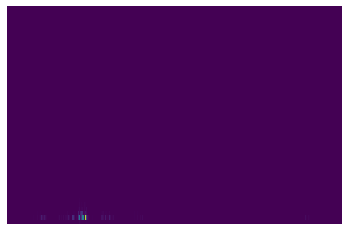

In [58]:
to_image('/content/Training_wav/puppy/', '/content/Training/puppy/')
to_image('/content/Validation_wav/puppy/', '/content/Validation/puppy/')

## Getting the zip files of training and validation

In [60]:
!zip -r Training.zip "/content/Training"
!zip -r Validation.zip "/content/Validation"

  adding: content/Training/ (stored 0%)
  adding: content/Training/barbie/ (stored 0%)
  adding: content/Training/barbie/barbie_16sin.wav (deflated 25%)
  adding: content/Training/barbie/barbie_10.wav (deflated 28%)
  adding: content/Training/barbie/barbie_31uniform.wav (deflated 23%)
  adding: content/Training/barbie/barbie_24cos.wav (deflated 23%)
  adding: content/Training/barbie/barbie_17.wav (deflated 24%)
  adding: content/Training/barbie/barbie_39sawtooth.wav (deflated 23%)
  adding: content/Training/barbie/barbie_1.wav (deflated 28%)
  adding: content/Training/barbie/barbie_5uniform.wav (deflated 19%)
  adding: content/Training/barbie/barbie_1quadratic.wav (deflated 28%)
  adding: content/Training/barbie/barbie_4sawtooth.wav (deflated 13%)
  adding: content/Training/barbie/barbie_16gaussian.wav (deflated 25%)
  adding: content/Training/barbie/barbie_13sin.wav (deflated 15%)
  adding: content/Training/barbie/barbie_25sawtooth.wav (deflated 27%)
  adding: content/Training/barbie/